In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define the dataset
data = {
    'Group': ['CG', 'CMTG', 'CHTG', 'CDG', 'DMG', 'DMTG', 'DHTG', 'DMMTG', 'DMHTG'],
    'miR-133a Expression (Fold Change)': [1, 1, 1, 1.8, 1.1, 1.2, 1.3, 0.9, 0.8],
    'Body Weight (g)': [250, 240, 231, 200, 230, 215, 212, 225, 222],
    'Blood Glucose (mg/dL)': [105.2, 95.01, 95, 400.01, 152.05, 175.1, 170.5, 140.3, 128.5],
    'Insulin (µIU/mL)': [3.6, 3.12, 3, 5.58, 4.02, 4.56, 4.38, 3.6, 3.6],
    'HOMA-IR': [0.93, 0.73, 0.7, 5.51, 1.5, 1.97, 1.84, 1.24, 1.14],
    'HbA1c (mmol/l)': [4.1, 4, 3.8, 7, 5.7, 6.4, 6.1, 5.5, 5.3],
    'Total Cholesterol (mg/dL)': [60.4, 58.01, 56.21, 82.1, 70.2, 65.7, 62.3, 63.1, 62.2],
    'HDL (mg/dL)': [27, 25.5, 22, 36.7, 29.5, 29.5, 27, 26, 25],
    'LDL (mg/dL)': [26.2, 24.9, 23.5, 34.1, 28.4, 33.2, 31.5, 28.4, 25.6],
    'Triglycerides (mg/dL)': [106.01, 95.02, 89.1, 166.3, 114.4, 141.2, 138.1, 109.3, 106.4]
}

df = pd.DataFrame(data)

# Convert categorical groups to numerical values using one-hot encoding
df = pd.get_dummies(df, columns=['Group'], drop_first=True)

# Choose the target variable 
target = 'miR-133a Expression (Fold Change)'

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(target, axis=1), df[target], test_size=0.2, random_state=42)

# Create a CatBoostRegressor model
model = CatBoostRegressor(
    iterations=1000,  # Number of boosting iterations
    learning_rate=0.1, # Learning rate
    depth=6,            # Tree depth
    loss_function='RMSE', # Loss function for regression
    eval_metric='RMSE', # Metric to evaluate the model during training
    random_seed=42
)

# Train the model on the training data
model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=100)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Example prediction with a new data point
new_data = {
    'Group_CMTG': 1,
    'Group_CHTG': 0,
    'Group_DMG': 0,
    'Group_DMTG': 0,
    'Group_DHTG': 0,
    'Group_DMMTG': 0,
    'Group_DMHTG': 0,
    'Group_CG': 0,  
    'Body Weight (g)': 245,
    'Blood Glucose (mg/dL)': 110,
    'Insulin (µIU/mL)': 3.8,
    'HOMA-IR': 0.85,
    'HbA1c (mmol/l)': 4.2,
    'Total Cholesterol (mg/dL)': 59,
    'HDL (mg/dL)': 26,
    'LDL (mg/dL)': 25,
    'Triglycerides (mg/dL)': 98
}

new_df = pd.DataFrame([new_data])

# Ensure the features in new_df match those used during training
new_df = new_df[X_train.columns]

predicted_miR_133a = model.predict(new_df)[0]
print(f"Predicted miR-133a expression (Fold Change): {predicted_miR_133a}")

0:	learn: 0.2880144	test: 0.2164263	best: 0.2164263 (0)	total: 139ms	remaining: 2m 18s
100:	learn: 0.0222445	test: 0.0405648	best: 0.0405648 (100)	total: 180ms	remaining: 1.6s
200:	learn: 0.0017688	test: 0.0291942	best: 0.0291942 (200)	total: 217ms	remaining: 864ms
300:	learn: 0.0001407	test: 0.0285307	best: 0.0285307 (300)	total: 252ms	remaining: 586ms
400:	learn: 0.0000112	test: 0.0284851	best: 0.0284851 (400)	total: 286ms	remaining: 427ms
500:	learn: 0.0000009	test: 0.0284810	best: 0.0284810 (500)	total: 330ms	remaining: 329ms
600:	learn: 0.0000001	test: 0.0284807	best: 0.0284807 (600)	total: 367ms	remaining: 244ms
700:	learn: 0.0000000	test: 0.0284807	best: 0.0284807 (700)	total: 426ms	remaining: 182ms
800:	learn: 0.0000000	test: 0.0284807	best: 0.0284807 (800)	total: 461ms	remaining: 114ms
900:	learn: 0.0000000	test: 0.0284807	best: 0.0284807 (900)	total: 494ms	remaining: 54.2ms
999:	learn: 0.0000000	test: 0.0284807	best: 0.0284807 (999)	total: 528ms	remaining: 0us

bestTest = 0.0

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define the dataset (same as before)
# ... (your dataset code)

# Choose the target variable
target = 'miR-133a Expression (Fold Change)'

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(target, axis=1), df[target], test_size=0.2, random_state=42)

# Create a CatBoostRegressor model
model = CatBoostRegressor(
    iterations=1000,  # Number of boosting iterations
    learning_rate=0.1, # Learning rate
    depth=5,            # Tree depth
    l2_leaf_reg=8,
    loss_function='RMSE', # Loss function for regression
    eval_metric='RMSE', # Metric to evaluate the model during training
    random_seed=42
)

# Train the model on the training data
model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=100)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Example prediction with a new data point
new_data = {
    'Group_CMTG': 1,
    'Group_CHTG': 0,
    'Group_DMG': 0,
    'Group_DMTG': 0,
    'Group_DHTG': 0,
    'Group_DMMTG': 0,
    'Group_DMHTG': 0,
    'Group_CG': 0,  
    'Body Weight (g)': 245,
    'Blood Glucose (mg/dL)': 110,
    'Insulin (µIU/mL)': 3.8,
    'HOMA-IR': 0.85,
    'HbA1c (mmol/l)': 4.2,
    'Total Cholesterol (mg/dL)': 59,
    'HDL (mg/dL)': 26,
    'LDL (mg/dL)': 25,
    'Triglycerides (mg/dL)': 98
}

new_df = pd.DataFrame([new_data])

# Ensure the features in new_df match those used during training
new_df = new_df[X_train.columns]

predicted_miR_133a = model.predict(new_df)[0]
print(f"Predicted miR-133a expression (Fold Change): {predicted_miR_133a}")

0:	learn: 0.2926838	test: 0.2217115	best: 0.2217115 (0)	total: 377us	remaining: 377ms
100:	learn: 0.0908866	test: 0.0490326	best: 0.0490326 (100)	total: 31.8ms	remaining: 283ms
200:	learn: 0.0297337	test: 0.0020359	best: 0.0007682 (193)	total: 68.1ms	remaining: 271ms
300:	learn: 0.0097275	test: 0.0190181	best: 0.0007682 (193)	total: 105ms	remaining: 244ms
400:	learn: 0.0031824	test: 0.0243839	best: 0.0007682 (193)	total: 140ms	remaining: 209ms
500:	learn: 0.0010411	test: 0.0262931	best: 0.0007682 (193)	total: 175ms	remaining: 174ms
600:	learn: 0.0003406	test: 0.0269178	best: 0.0007682 (193)	total: 209ms	remaining: 139ms
700:	learn: 0.0001114	test: 0.0271222	best: 0.0007682 (193)	total: 238ms	remaining: 102ms
800:	learn: 0.0000365	test: 0.0271890	best: 0.0007682 (193)	total: 272ms	remaining: 67.5ms
900:	learn: 0.0000119	test: 0.0272109	best: 0.0007682 (193)	total: 309ms	remaining: 34ms
999:	learn: 0.0000039	test: 0.0272180	best: 0.0007682 (193)	total: 342ms	remaining: 0us

bestTest = 0.

In [5]:
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation with RMSE as the metric
scores = cross_val_score(model, df.drop(target, axis=1), df[target], cv=kf, scoring='neg_mean_squared_error')

# Convert negative MSE to positive
mse_scores = -scores

# Print the mean and standard deviation of the MSE scores
print(f"Mean Squared Error (Cross-Validation): {mse_scores.mean()}")
print(f"Standard Deviation of MSE: {mse_scores.std()}")

0:	learn: 0.2926838	total: 397us	remaining: 397ms
1:	learn: 0.2880466	total: 712us	remaining: 356ms
2:	learn: 0.2838305	total: 993us	remaining: 330ms
3:	learn: 0.2795681	total: 1.25ms	remaining: 312ms
4:	learn: 0.2763277	total: 2.74ms	remaining: 545ms
5:	learn: 0.2730102	total: 3.37ms	remaining: 559ms
6:	learn: 0.2688032	total: 3.67ms	remaining: 520ms
7:	learn: 0.2658099	total: 4ms	remaining: 496ms
8:	learn: 0.2624356	total: 4.35ms	remaining: 479ms
9:	learn: 0.2593375	total: 4.74ms	remaining: 469ms
10:	learn: 0.2561392	total: 5.18ms	remaining: 466ms
11:	learn: 0.2524467	total: 5.48ms	remaining: 451ms
12:	learn: 0.2486734	total: 5.71ms	remaining: 433ms
13:	learn: 0.2451462	total: 6.22ms	remaining: 438ms
14:	learn: 0.2419541	total: 6.65ms	remaining: 437ms
15:	learn: 0.2393303	total: 7ms	remaining: 431ms
16:	learn: 0.2366681	total: 7.35ms	remaining: 425ms
17:	learn: 0.2333495	total: 7.63ms	remaining: 416ms
18:	learn: 0.2306365	total: 7.94ms	remaining: 410ms
19:	learn: 0.2274406	total: 8.1

C:\Users\Alireza\AppData\Local\Temp\ipykernel_7816\522685685.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette=palette, edgecolor='black')


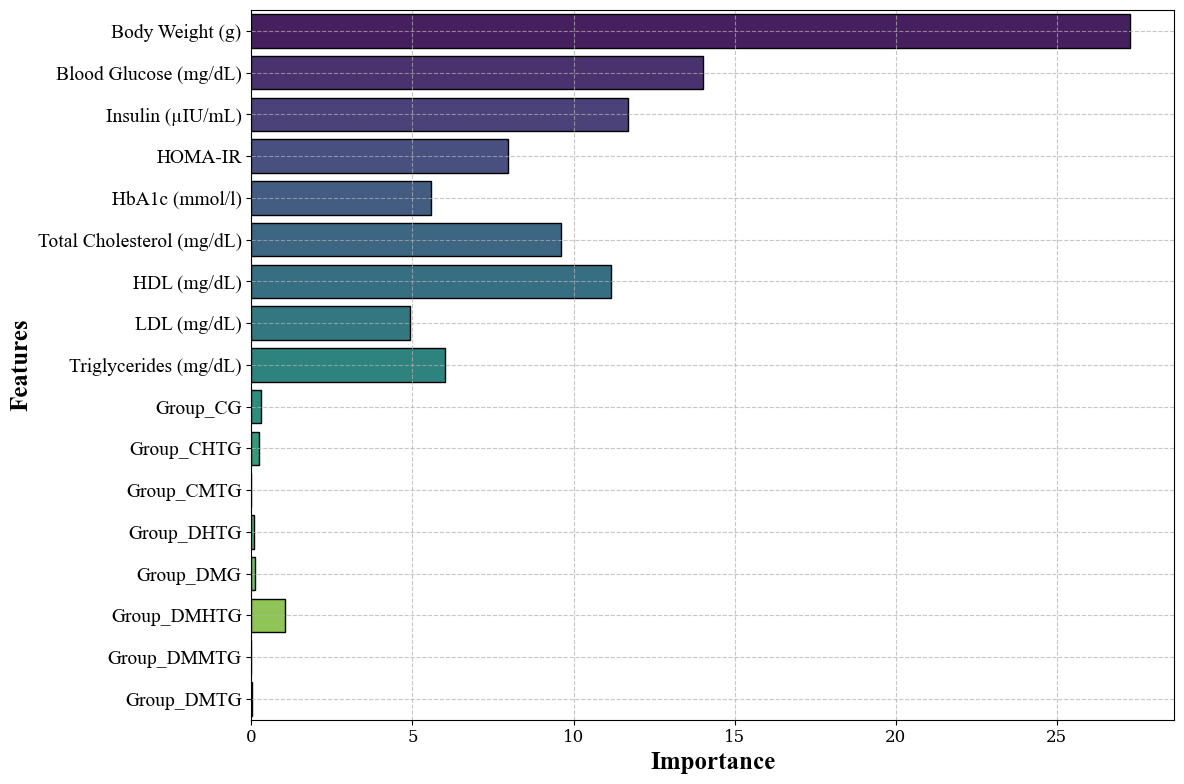

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_importance(model, X_train, palette='viridis', figsize=(12, 8), font_family='serif', title_fontsize=16, feature_font_size=14):
    """
    Plots feature importances from a trained model with enhanced style and larger feature labels.

    Args:
        model: The trained machine learning model.
        X_train: The training dataset used for fitting the model.
        palette: The color palette to use for the plot.
        figsize: The size of the plot figure.
        font_family: The font family for labels and titles.
        title_fontsize: Font size for the plot title.
        feature_font_size: Font size for the feature labels.

    Returns:
        None. Displays the feature importance plot.
    """

    importances = model.get_feature_importance()
    feature_names = X_train.columns

    plt.figure(figsize=figsize)
    sns.barplot(x=importances, y=feature_names, palette=palette, edgecolor='black')
    plt.xlabel('Importance', fontsize=18, fontfamily=font_family, fontweight='bold')
    plt.ylabel('Features', fontsize=18, fontfamily=font_family, fontweight='bold')
    plt.grid(True, linestyle='--', alpha=0.7)

    # Adjust feature labels for better style and size
    plt.yticks(fontsize=feature_font_size, fontfamily=font_family)  
    plt.tight_layout()  
    plt.show()

# Example usage with larger feature font and style
plot_feature_importance(model, X_train, palette='viridis', font_family='Times New Roman', title_fontsize=18, feature_font_size=14) 

C:\Users\Alireza\AppData\Local\Temp\ipykernel_7816\4185959436.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette=palette, edgecolor='black')


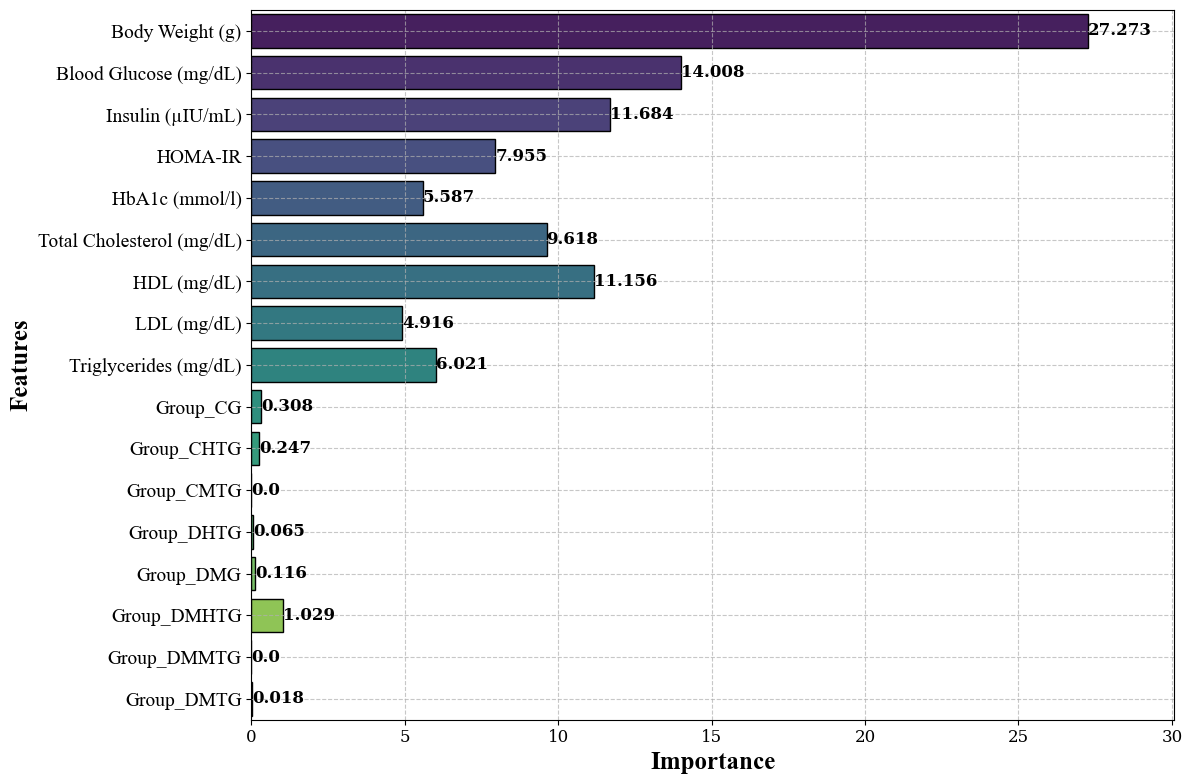

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_importance(model, X_train, palette='viridis', figsize=(12, 8), font_family='serif', title_fontsize=16, feature_font_size=14, dpi=300):
    """
    Plots feature importances from a trained model with enhanced style, larger feature labels, and high-quality saving.

    Args:
        model: The trained machine learning model.
        X_train: The training dataset used for fitting the model.
        palette: The color palette to use for the plot.
        figsize: The size of the plot figure.
        font_family: The font family for labels and titles.
        title_fontsize: Font size for the plot title.
        feature_font_size: Font size for the feature labels.
        dpi: The resolution (dots per inch) for saving the plot.

    Returns:
        None. Saves the feature importance plot to a file.
    """

    importances = model.get_feature_importance()
    feature_names = X_train.columns

    plt.figure(figsize=figsize)
    sns.barplot(x=importances, y=feature_names, palette=palette, edgecolor='black')
    plt.xlabel('Importance', fontsize=18, fontfamily=font_family, fontweight='bold')
    plt.ylabel('Features', fontsize=18, fontfamily=font_family, fontweight='bold')
    plt.grid(True, linestyle='--', alpha=0.7)

    # Adjust feature labels for better style and size
    plt.yticks(fontsize=feature_font_size, fontfamily=font_family)  
    plt.tight_layout()  

    # Add value of y for each row (importance values)
    for i, v in enumerate(importances):
        plt.text(v, i, str(round(v, 3)), color='black', ha='left', va='center', fontweight='bold')

    # Expand the x-axis limits to provide more space
    plt.xlim(0, plt.xlim()[1] * 1.05) # Increase the x-axis limit by 10%

    # Save the plot with high quality
    plt.savefig('feature_importance.png', dpi=400)  # Use a higher DPI for better quality
    plt.show()

# Example usage with larger feature font and style
plot_feature_importance(model, X_train, palette='viridis', font_family='Times New Roman', title_fontsize=18, feature_font_size=14, dpi=300) 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, learning_curve
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Define the dataset
data = {
    'Group': ['CG', 'CMTG', 'CHTG', 'CDG', 'DMG', 'DMTG', 'DHTG', 'DMMTG', 'DMHTG'],
    'miR-133a Expression (Fold Change)': [1, 1, 1, 1.8, 1.1, 1.2, 1.3, 0.9, 0.8],
    'Body Weight (g)': [250, 240, 231, 200, 230, 215, 212, 225, 222],
    'Blood Glucose (mg/dL)': [105.2, 95.01, 95, 400.01, 152.05, 175.1, 170.5, 140.3, 128.5],
    'Insulin (µIU/mL)': [3.6, 3.12, 3, 5.58, 4.02, 4.56, 4.38, 3.6, 3.6],
    'HOMA-IR': [0.93, 0.73, 0.7, 5.51, 1.5, 1.97, 1.84, 1.24, 1.14],
    'HbA1c (mmol/l)': [4.1, 4, 3.8, 7, 5.7, 6.4, 6.1, 5.5, 5.3],
    'Total Cholesterol (mg/dL)': [60.4, 58.01, 56.21, 82.1, 70.2, 65.7, 62.3, 63.1, 62.2],
    'HDL (mg/dL)': [27, 25.5, 22, 36.7, 29.5, 29.5, 27, 26, 25],
    'LDL (mg/dL)': [26.2, 24.9, 23.5, 34.1, 28.4, 33.2, 31.5, 28.4, 25.6],
    'Triglycerides (mg/dL)': [106.01, 95.02, 89.1, 166.3, 114.4, 141.2, 138.1, 109.3, 106.4]
}

df = pd.DataFrame(data)

# Convert categorical groups to numerical values using one-hot encoding
df = pd.get_dummies(df, columns=['Group'], drop_first=True)
# Choose the target variable 
target = 'miR-133a Expression (Fold Change)'

# Define learning curve function
def plot_learning_curve(model, X, y):
    """Plots the learning curve of a model.

    Args:
        model: The model to evaluate.
        X: The features.
        y: The target variable.
    """

    train_sizes = np.linspace(0.1, 1.0, 10)
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, train_sizes=train_sizes, cv=5, scoring='neg_root_mean_squared_error'
    )
    train_scores = -train_scores
    test_scores = -test_scores
    
    plt.figure()
    plt.title("Learning Curve")
    plt.xlabel("Training Examples")
    plt.ylabel("RMSE")
    plt.grid(True)
    
    plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', label="Training Score")
    plt.plot(train_sizes, test_scores.mean(axis=1), 'o-', label="Cross-validation Score")
    
    plt.legend(loc="best")
    plt.show()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(target, axis=1), df[target], test_size=0.2, random_state=42)

# Create a CatBoostRegressor model
model = CatBoostRegressor(
    iterations=1000,  # Number of boosting iterations
    learning_rate=0.1, # Learning rate
    depth=5,            # Tree depth

    loss_function='RMSE', # Loss function for regression
    eval_metric='RMSE', # Metric to evaluate the model during training
    random_seed=42
)

# Train the model on the training data
model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=100)

# Evaluate the model
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"RMSE: {rmse}")

# Plot learning curve
plot_learning_curve(model, df.drop(target, axis=1), df[target])


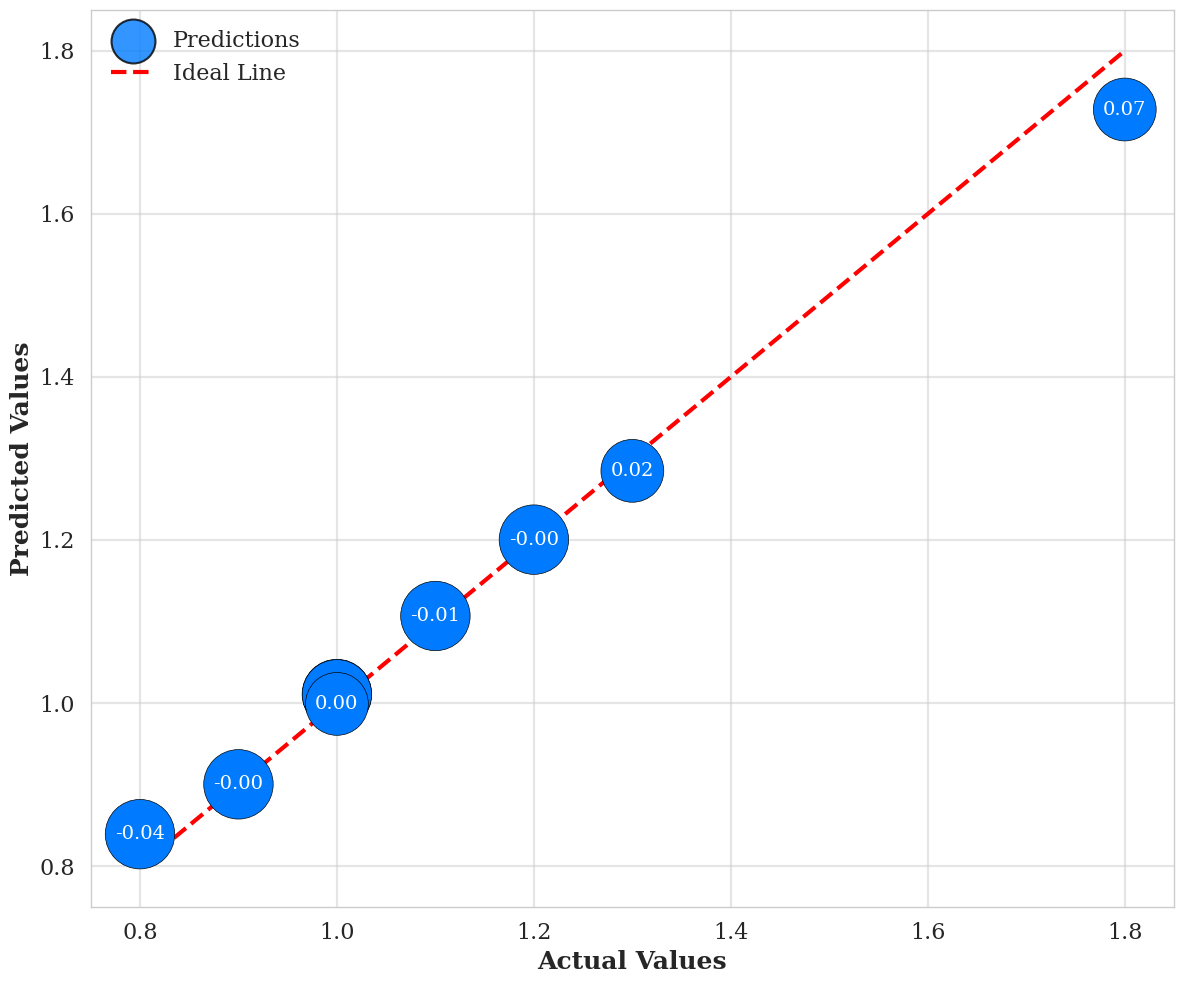

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# ... (Your model training and prediction code) ...

# Combine predictions and actual values
train_data = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})
test_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
combined_data = pd.concat([train_data, test_data], axis=0)

# Calculate the difference between actual and predicted values
combined_data['Difference'] = combined_data['Actual'] - combined_data['Predicted']

# Create the plot
plt.figure(figsize=(12, 10))  # Larger figure size

# Scatter plot with blue circles and white text
plt.scatter(combined_data['Actual'], combined_data['Predicted'], 
            color='#007bff', s=1000, alpha=0.8, label='Predictions',  # Blue color, even bigger size
            marker='o', edgecolors='black', linewidths=1.5)  # Black outlines

# Plot the ideal line (y=x)
plt.plot([combined_data['Actual'].min(), combined_data['Actual'].max()],
         [combined_data['Actual'].min(), combined_data['Actual'].max()], 
         color='#ff0000', lw=3, linestyle='--', label='Ideal Line')  # Bold red line

# Add annotations for difference inside each circle with white text
for i, row in combined_data.iterrows():
    plt.annotate(f"{row['Difference']:.2f}", 
                 xy=(row['Actual'], row['Predicted']), 
                 fontsize=14, ha='center', va='center',
                 color='white',  # White text color
                 bbox=dict(facecolor='#007bff', edgecolor='black', boxstyle='circle,pad=0.5'))  # Blue circle, black outline, more padding

# Customize the plot
plt.xlabel('Actual Values', fontsize=18, fontweight='bold')  # Larger, bold font
plt.ylabel('Predicted Values', fontsize=18, fontweight='bold')
plt.grid(True, alpha=0.5)
plt.legend(fontsize=16)

# Adjust the layout for better readability
plt.tight_layout()
plt.savefig("Actual Values.png", dpi=300, bbox_inches='tight') 

plt.show()

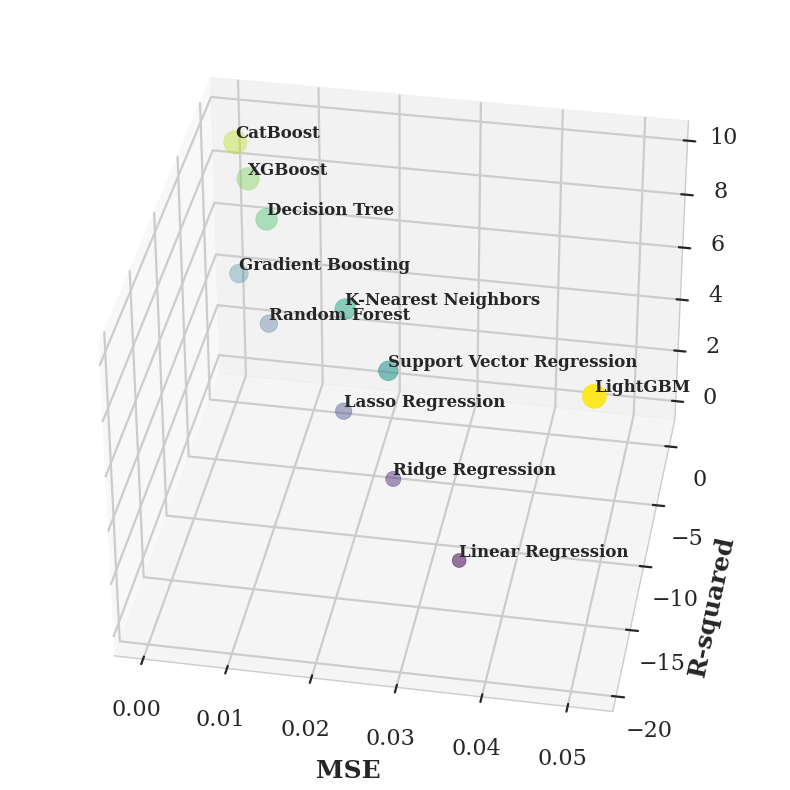

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Data
models = [
    "Linear Regression", "Ridge Regression", "Lasso Regression", "Random Forest",
    "Gradient Boosting", "Support Vector Regression", "K-Nearest Neighbors",
    "Decision Tree", "XGBoost", "CatBoost", "LightGBM"
]
mse = [
    0.0338, 0.0241, 0.0166, 0.0050, 0.0003,
    0.0234, 0.0170, 0.0050, 0.0022, 0.0003, 0.0515
]
r_squared = [
    -12.5251, -8.6554, -5.6294, -1.0114, 0.8826,
    -8.3768, -5.8000, -1.0000, 0.1017, 0.8894, -19.6122
]

# 3D plot setup
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Color map and point sizes
cmap = plt.cm.viridis  # Directly access the colormap
colors = cmap(np.linspace(0, 1, len(models)))
sizes = np.linspace(100, 300, len(models))  # Varying point sizes for better visualization

# Scatter plot
sc = ax.scatter(mse, r_squared, np.arange(len(models)), s=sizes, c=colors, depthshade=True)

# Annotate each point with the model name with slight offsets
for i, model in enumerate(models):
    ax.text(mse[i], r_squared[i], i, model, fontsize=12, ha='left', weight='bold', va='bottom')

# Customize the appearance
ax.set_xlabel("MSE", fontsize=18, labelpad=20, weight='bold')
ax.set_ylabel("R-squared", fontsize=18, labelpad=20, weight='bold')
# ax.set_zlabel("Model Index", fontsize=18, labelpad=20)  # Removed

# Set the view angle
ax.view_init(elev=35., azim=-80)

# Add Title (Centered)

# Enhanced style
plt.style.use('seaborn-v0_8-whitegrid') # Use a clean whitegrid style
plt.rcParams['font.family'] = 'serif' # Set serif font for a more professional look
plt.savefig("model_performance_3d.png", dpi=300, bbox_inches='tight') 

# Show plot
plt.show()